In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/Height_Weight.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0.5, 1.0, 'Height v/s Weight plot for Male and Females')

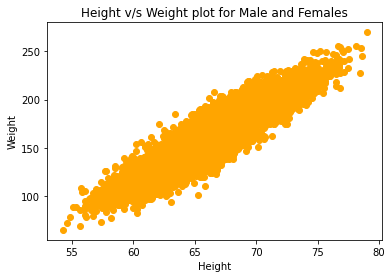

In [3]:
# plot the data
plt.scatter(df['Height'], df['Weight'], color='orange')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height v/s Weight plot for Male and Females')

# Take sample of the data and plot

Text(0.5, 1.0, 'Height v/s Weight plot for 10 random Male and Females')

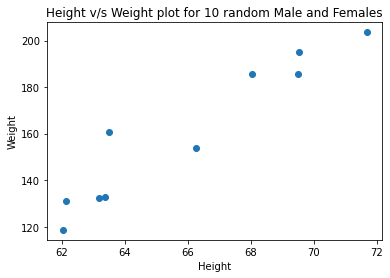

In [4]:
s_df = df.sample(n=10, random_state=11) 
plt.scatter(s_df['Height'], s_df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height v/s Weight plot for 10 random Male and Females')

# Split into Train and Test sets¶

In [5]:
train, test = train_test_split(s_df, test_size=0.3, random_state=11)
train = train.sort_values('Height')
test = test.sort_values('Height')

# predictors
xtrain = train['Height'].to_frame()
xtest  = test['Height'].to_frame()

# output
ytrain = train['Weight']
ytest  = test['Weight']

In [6]:
lr = LinearRegression().fit(xtrain, ytrain)

In [7]:
# the score is actually coefficient of determination
lr.score(xtrain, ytrain)

0.8159718383194039

In [8]:
lr.coef_ , lr.intercept_

# Weight = -351.917 + 7.77xHeight

(array([7.77384594]), -351.91741225786853)

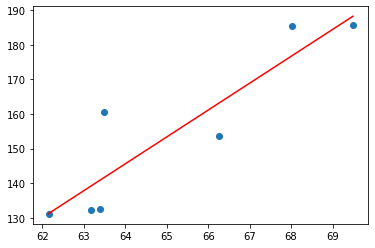

In [9]:
plt.scatter(xtrain, ytrain)
ypred = lr.predict(xtrain)
plt.plot(xtrain['Height'], ypred,color='red')

* Through this graph, we are able to capture the trend in this sample but if we want to know about the significance of coefficient that we had, we have to perform statistical test because the model(LinearRegression() or else) itself will not tell about significance of the coefficient(slope).    

In [10]:
# H0, null hypothesis is considered which says that coefficients are insignificant, i.e., essentially they are zero
# H1, alternative hypthesis is considered which says that coefficients are significant, i.e., essentially they are non-zero.
# It is a two way hypothesis

import statsmodels.api as sm
X = sm.add_constant(xtrain) # Adding constant to the input data
model = sm.OLS(ytrain, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     22.17
Date:                Thu, 24 Oct 2024   Prob (F-statistic):            0.00530
Time:                        09:58:12   Log-Likelihood:                -25.747
No. Observations:                   7   AIC:                             55.49
Df Residuals:                       5   BIC:                             55.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -351.9174    107.635     -3.270      0.0

/Users/alokbhardwaj/opt/anaconda3/envs/ai_env/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


- P>|t| = 0.005. At 5% significance level, alpha is set at 0.05. As p-value is less than alpha, which indicates that probability of obtaining an extreme value lower than 0.05 is extremely low. so, null hypothesis can be rejected. That is to say that the coefficiencts are significant and they are non-zero in value. 

# Ridge Regression

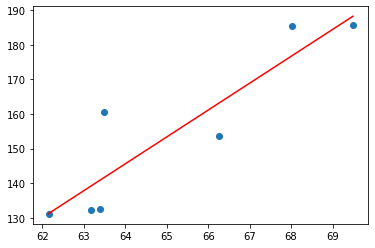

In [11]:
from sklearn.linear_model import Ridge, Lasso
model = Ridge(alpha=0).fit(xtrain, ytrain) # alpha=0 is plain linear regression, i.e., no regularization
plt.scatter(xtrain['Height'], ytrain)
ypred = model.predict(xtrain)    
plt.plot(xtrain['Height'], ypred,color='red')
plt.show()

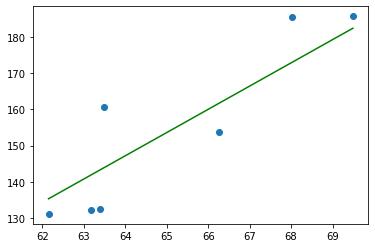

In [12]:
model = Ridge(alpha=10).fit(xtrain, ytrain) # alpha=10 implies regularization is performed on the coefficient estimates
plt.scatter(xtrain['Height'], ytrain)
ypred = model.predict(xtrain)    
plt.plot(xtrain['Height'], ypred,color='green')
plt.show()

It has reduced the slope of coef which we are estimating

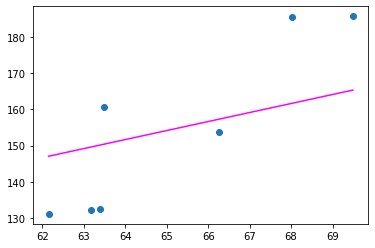

In [27]:
model = Ridge(alpha=100).fit(xtrain, ytrain) 
# alpha=100 implies regularization is performed on the coefficient estimates
# the model becomes less flexible with lower variance. Essentially, the slope of estimated coefficients is reduced
plt.scatter(xtrain['Height'], ytrain)
ypred = model.predict(xtrain)    
plt.plot(xtrain['Height'], ypred,color='magenta')
plt.show()

It has further reduced the slope of coef with increase in alpha value

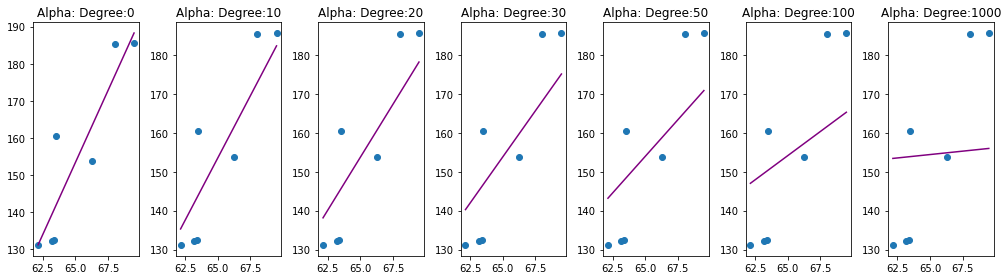

In [13]:
fig, ax = plt.subplots(1,7,figsize=(14,4))
for x, alpha in enumerate([0,10,20,30,50,100,1000]):
    model = Ridge(alpha=alpha).fit(xtrain, ytrain)
    ax[x].scatter(xtrain['Height'], ytrain)
    
    ypred = model.predict(xtrain)
    ax[x].plot(xtrain['Height'], ypred,color='purple')
    title_text = 'Alpha: Degree:'+str(alpha)
    ax[x].set_title(title_text)
    
plt.tight_layout()

* Above we can see that when we apply ridge regression with higher alphas, the slope tends to decrease and eventually moves toward zero due to the penalty factor
* Ideally we don't penalize single column
* We perform regularization when we have multiple cols 

# Lasso Reg

/var/folders/5g/0yr9vjys1xb_dx5d7p39f5dc0000gn/T/ipykernel_48100/1027451438.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=alpha).fit(xtrain, ytrain)
/Users/alokbhardwaj/opt/anaconda3/envs/ai_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


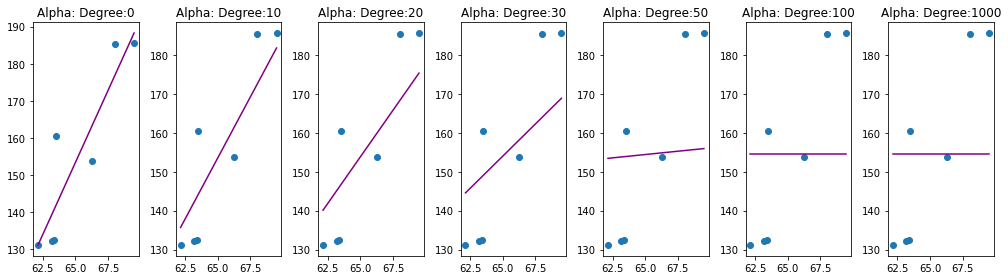

In [14]:
fig, ax = plt.subplots(1,7, figsize=(14,4))

for x, alpha in enumerate([0,10,20,30,50,100,1000]):
    model = Lasso(alpha=alpha).fit(xtrain, ytrain)
    ax[x].scatter(xtrain['Height'],ytrain)
    
    ypred = model.predict(xtrain)
    
    ax[x].plot(xtrain['Height'], ypred,color='purple')
    title_text = 'Alpha: Degree:'+str(alpha)
    ax[x].set_title(title_text)
    
plt.tight_layout()

* When we apply **lasso regression**, it reduces the slope of our coef but it reduces the slope drastically compared to ridge regression i.e slope reaches zero with little increase in alpha values

* It implies that lasso makes insignificant coef to be zero with very less alpha values. It is useful for interpretability of the model but may make less precise estimates

## Diff b/w Lasso and Ridge
Ridge will not reach exact zero but Lasso does 

# Dataset

In [15]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
ohe = pd.get_dummies(data.drop(columns=['age','bmi','children', 'charges']), drop_first=True)
ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [17]:
x = data.drop(columns='charges')
ohe_x = pd.concat([x, ohe], axis=1)
ohe_x = ohe_x.drop(columns=['sex','smoker','region'])
y = data['charges']

In [18]:
ohe_x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(ohe_x, y, test_size=.2, random_state=1)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1070, 8), (1070,), (268, 8), (268,))

# Calculate coeff on multiple columns/parameters

# Lasso

In [20]:
df_coefs = pd.DataFrame({'parameters' : xtrain.columns})

In [21]:
print (df_coefs)

         parameters
0               age
1               bmi
2          children
3          sex_male
4        smoker_yes
5  region_northwest
6  region_southeast
7  region_southwest


In [22]:
for alpha in [10,50,100,200,500]:
    model = Lasso(alpha=alpha).fit(xtrain, ytrain)
    df_coefs['Slope_alpha_%d' % alpha] = model.coef_

In [24]:
df_coefs

,parameters,Slope_alpha_10,Slope_alpha_50,Slope_alpha_100,Slope_alpha_200,Slope_alpha_500
0,age,257.461205,257.495829,257.620381,257.069987,255.430129
1,bmi,319.333636,310.520664,301.378524,298.593870,290.236761
2,children,397.827905,364.658506,331.061649,258.579147,41.130597
3,sex_male,-195.389787,-13.435026,-0.000000,-0.000000,-0.000000
4,smoker_yes,23720.881030,23451.747227,23129.186920,22512.301788,20661.653082
5,region_northwest,-229.876612,0.000000,0.000000,0.000000,0.000000
6,region_southeast,-866.527559,-396.037623,-0.000000,-0.000000,-0.000000
7,region_southwest,-735.643478,-283.152033,-0.000000,-0.000000,-0.000000


Above results carry zero values for multiple columns with the increase in alpha values due to **lasso regression** which displays that the model discards insignificant cols 

# Ridge

In [23]:
for alpha in [10,50,100,200,500]:
    model = Ridge(alpha=alpha).fit(xtrain, ytrain)
    df_coefs['Slope_alpha_%d' % alpha] = model.coef_

In [24]:
df_coefs

,parameters,Slope_alpha_10,Slope_alpha_50,Slope_alpha_100,Slope_alpha_200,Slope_alpha_500
0,age,256.983239,255.348275,253.898159,252.041627,249.488276
1,bmi,318.633202,310.840292,305.654737,300.740385,295.903822
2,children,396.521765,360.748999,329.515472,288.125351,222.593697
3,sex_male,-157.551994,67.287373,206.244176,301.584921,287.924800
4,smoker_yes,22487.112919,18458.352830,15085.049099,11051.521234,6136.633938
5,region_northwest,-331.740010,-209.286515,-156.524075,-118.341505,-78.305818
6,region_southeast,-880.859760,-501.461259,-274.544105,-85.709591,34.502567
7,region_southwest,-814.280055,-615.801200,-497.942298,-378.641895,-231.760969


Above results shows that the values in insignificant cols are very small but no column approached zero upon increment in alpha values